In [1]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_port = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
novas_stopwords = ['RT', 'sobre', 'Saiba', 'MPSP', 'Defensoria', 'Pública', 'Defensoria Pública']
for palavra in novas_stopwords:
  stopwords_port.add(palavra)
stopwords_port

In [3]:
import pandas as pd
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
%matplotlib inline

# Carrega as credenciais da API do Twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
username = 'mpsp_oficial'
max_tweets = 3000
 
# Query
tweets = tweepy.Cursor(api.user_timeline, id=username, tweet_mode='extended').items(max_tweets)

In [5]:
# Lista de tweets
tweets_list = []
for tweet in tweets:
  tweets_list.append([tweet.id_str, tweet.full_text, tweet.created_at, tweet.user.screen_name, tweet.retweet_count, 
                      tweet.favorite_count, tweet.lang, tweet.source, tweet.in_reply_to_screen_name, 
                      tweet.in_reply_to_status_id_str, tweet.in_reply_to_user_id_str, tweet.is_quote_status])

# Colunas do dataframe
colunas = ['Id. único', 'Texto', 'Criado em', 'Usuário', 'Qtd. retuítes', 'Likes', 'Língua', 'Fonte', 
           'Em resposta ao user:', 'Em resp. ao status de id:', 'Em resp. ao user de id:', 'Tuíte citado?']

# Criação do dataframe 
tweets_df = pd.DataFrame(tweets_list, columns=colunas)

In [6]:
# Verificação: é um retuíte?
def verifica_retuite(texto):
  if texto.startswith('RT @'):
    return True
  else:
    return False

tweets_df ['É retuíte?'] = tweets_df['Texto'].apply(lambda x: verifica_retuite(x))

In [7]:
tweets_df.to_excel(username+'.xlsx')
tweets_df

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
0,1415412067151007750,"Acontece agora o webinar ""O capacitismo e as b...",2021-07-14 20:45:08,mpsp_oficial,0,1,pt,Twitter Web App,None,None,None,True,False
1,1415399131116343298,"#ViolênciaPolicial Segundo os relatos, após pe...",2021-07-14 19:53:44,mpsp_oficial,0,0,pt,Twitter Web App,None,None,None,False,False
2,1415382413765660676,"Apesar de não ser nova, a não-binariedade aind...",2021-07-14 18:47:18,mpsp_oficial,0,3,pt,Twitter Web App,None,None,None,False,False
3,1415367992410529800,Artigo discorre sobre o inconsciente coletivo ...,2021-07-14 17:50:00,mpsp_oficial,1,4,pt,Twitter Web App,None,None,None,False,False
4,1415352940072783882,"Na terça (13), a Justiça condenou seis réus no...",2021-07-14 16:50:11,mpsp_oficial,1,1,pt,Twitter Web App,None,None,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1061974018138533889,#MPSP se reúne com representantes do Centro Pa...,2018-11-12 13:28:31,mpsp_oficial,1,2,pt,Twitter Web Client,None,None,None,False,False
2996,1061951197266018304,#MPSP se reúne com Comissão Interamericana de ...,2018-11-12 11:57:50,mpsp_oficial,2,3,pt,Twitter Web Client,None,None,None,False,False
2997,1060959562692468737,"@rjrac Olá, Rodrigo. O Twitter do MPSP é um ca...",2018-11-09 18:17:26,mpsp_oficial,0,0,pt,TweetDeck,rjrac,1060956651312898053,1411725228,False,False
2998,1060935915210768384,#MPSP denuncia 11 pessoas por tráfico de droga...,2018-11-09 16:43:28,mpsp_oficial,2,12,pt,Twitter Web Client,None,None,None,False,False


In [8]:
# Utilização de 'Expressões Regulares' para remover URL do tweet
def deleta_url (url):
  return re.sub(r'http\S+', '', url)

tweets_df['Texto'] = tweets_df['Texto'].apply(lambda x: deleta_url(x))

In [9]:
# Junta (faz o 'join') dos tuítes (coluna 'Texto' do dataframe) numa única string
dados = ' '.join(tweets_df['Texto'])

In [10]:
# Grava arquivo texto
arquivo = open(username+'.txt', 'w', encoding='utf-8')
arquivo.writelines(dados)
arquivo.close()

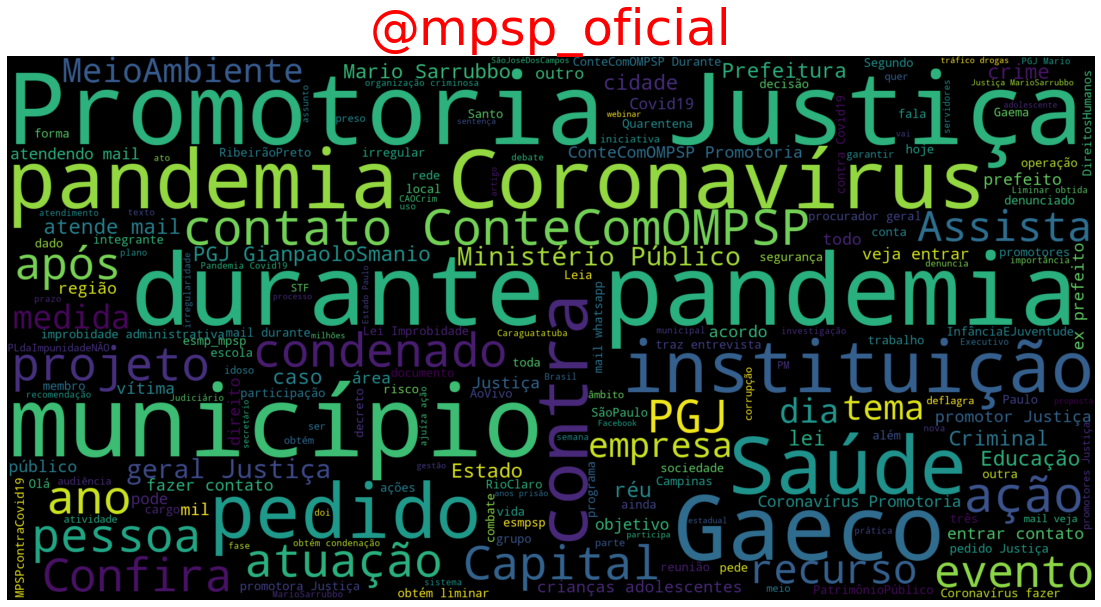

In [11]:
# Geração do Wordcloud
plt.figure(figsize=(20,10))
wc = WordCloud(mode="RGBA",
               stopwords = stopwords_port,
               width=2000, 
               height=1000,
               normalize_plurals=True).generate(dados)

plt.title('@'+username, fontsize=50, color="red")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(username+".png")
plt.show()

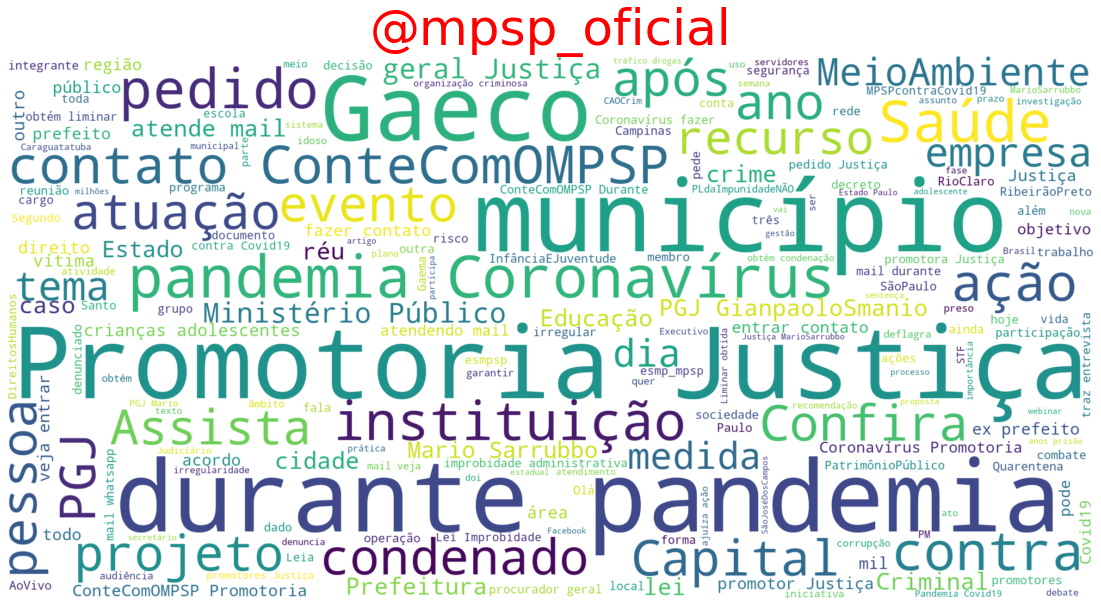

In [12]:
# Geração do Wordcloud
plt.figure(figsize=(20,10))
wc = WordCloud(background_color='white', 
               mode="RGB",
               stopwords=stopwords_port,
               width=2000, 
               height=1000,
               normalize_plurals=True).generate(dados)

plt.title('@'+username, fontsize=50, color="red")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(username+"1.png")
plt.show()

# **Análises**

In [13]:
# Mais retuitados (excluídos os retuítes feitos pelo próprio usuário)
criterio = tweets_df ['É retuíte?'] == False
tweets_df[criterio].sort_values(by='Qtd. retuítes', ascending=False).head(20)

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
183,1405148427827257351,#PLdaImpunidadeNÃO O texto do PL que afrouxa a...,2021-06-16 13:01:06,mpsp_oficial,171,230,pt,Twitter Web App,None,None,None,False,False
605,1374884017896579075,#MPSPcontraCovid Prefeito de Mirandópolis é mu...,2021-03-25 00:41:08,mpsp_oficial,102,284,pt,Twitter Web App,None,None,None,False,False
184,1405117956535635972,Hoje (16) está prevista votação do PL 10.887/2...,2021-06-16 11:00:01,mpsp_oficial,44,63,pt,Twitter Web App,None,None,None,False,False
193,1404856492449271816,"O #MPSP convida para #tuitaço, amanhã (16/06),...",2021-06-15 17:41:03,mpsp_oficial,42,61,pt,Twitter Web App,None,None,None,False,False
182,1405153938102538241,#PLdaImpunidadeNÃO O PL 10.887/2018 admite a p...,2021-06-16 13:22:59,mpsp_oficial,42,105,pt,Twitter Web App,None,None,None,False,False
2065,1214565943973576704,#MPSP e #MPRJ deflagram 2ª fase da #OperaçãoIl...,2020-01-07 15:14:21,mpsp_oficial,39,114,pt,Twitter Web App,None,None,None,False,False
174,1405164643912491015,⚠️#PLdaImpunidadeNÃO O PL 10.887/2018 prevê a ...,2021-06-16 14:05:32,mpsp_oficial,36,60,pt,Twitter Web App,None,None,None,False,False
598,1375431685240729613,"O #MPSPExplica como denunciar o ""fura-fila"" da...",2021-03-26 12:57:22,mpsp_oficial,35,81,pt,Twitter Web App,None,None,None,False,False
253,1399719300261453826,"Deflagrada nesta terça, #OperaçãoTokusatsu tem...",2021-06-01 13:27:41,mpsp_oficial,34,103,pt,Twitter Web App,None,None,None,False,False
1882,1239177024947789826,A determinação se deu por meio da Resolução No...,2020-03-15 13:10:00,mpsp_oficial,26,43,pt,TweetDeck,None,None,None,False,False


In [14]:
# Com mais 'likes', excluídos os retuitados
criterio = tweets_df ['É retuíte?'] == False
tweets_df[criterio].sort_values(by='Likes', ascending=False).head(20)

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
605,1374884017896579075,#MPSPcontraCovid Prefeito de Mirandópolis é mu...,2021-03-25 00:41:08,mpsp_oficial,102,284,pt,Twitter Web App,None,None,None,False,False
183,1405148427827257351,#PLdaImpunidadeNÃO O texto do PL que afrouxa a...,2021-06-16 13:01:06,mpsp_oficial,171,230,pt,Twitter Web App,None,None,None,False,False
2870,1085870658398154753,@CrociFranci @carolinamendes @JaniceAscari Olá...,2019-01-17 12:05:14,mpsp_oficial,9,132,pt,TweetDeck,CrociFranci,1085705679053246465,2378274430,False,False
2065,1214565943973576704,#MPSP e #MPRJ deflagram 2ª fase da #OperaçãoIl...,2020-01-07 15:14:21,mpsp_oficial,39,114,pt,Twitter Web App,None,None,None,False,False
182,1405153938102538241,#PLdaImpunidadeNÃO O PL 10.887/2018 admite a p...,2021-06-16 13:22:59,mpsp_oficial,42,105,pt,Twitter Web App,None,None,None,False,False
253,1399719300261453826,"Deflagrada nesta terça, #OperaçãoTokusatsu tem...",2021-06-01 13:27:41,mpsp_oficial,34,103,pt,Twitter Web App,None,None,None,False,False
598,1375431685240729613,"O #MPSPExplica como denunciar o ""fura-fila"" da...",2021-03-26 12:57:22,mpsp_oficial,35,81,pt,Twitter Web App,None,None,None,False,False
2937,1070661065116213250,#MPSP instaura inquérito para apurar morte de ...,2018-12-06 12:47:44,mpsp_oficial,24,79,pt,Twitter Web Client,None,None,None,False,False
184,1405117956535635972,Hoje (16) está prevista votação do PL 10.887/2...,2021-06-16 11:00:01,mpsp_oficial,44,63,pt,Twitter Web App,None,None,None,False,False
193,1404856492449271816,"O #MPSP convida para #tuitaço, amanhã (16/06),...",2021-06-15 17:41:03,mpsp_oficial,42,61,pt,Twitter Web App,None,None,None,False,False


In [15]:
# Interação com o público
criterio1 = (pd.notna(tweets_df['Em resposta ao user:'])) & (tweets_df['Em resposta ao user:'] != username)
tweets_df[criterio1]

,Id. único,Texto,Criado em,Usuário,Qtd. retuítes,Likes,Língua,Fonte,Em resposta ao user:,Em resp. ao status de id:,Em resp. ao user de id:,Tuíte citado?,É retuíte?
34,1412406633288900614,@PlanBR Juntos no enfrentamento às violências ...,2021-07-06 13:42:37,mpsp_oficial,0,0,pt,Twitter Web App,PlanBR,1412370933281705985,116851757,False,False
100,1409891660658532356,"@malunguinho É só chegar aqui, pessoal: \nAgr...",2021-06-29 15:09:01,mpsp_oficial,1,2,pt,Twitter Web App,malunguinho,1409890866852941824,1010042450788962304,False,False
104,1409600952261296129,"@bibliofernando Olá, Nando! Foi um erro. Obrig...",2021-06-28 19:53:50,mpsp_oficial,0,0,pt,Twitter Web App,bibliofernando,1409595470561918978,15516718,False,False
156,1405938307155087360,@ferpannunzio Milho faz um arraiá todinho! 🌽💛,2021-06-18 17:19:48,mpsp_oficial,0,1,pt,Twitter Web App,ferpannunzio,1405903533031968769,1291928190,False,False
157,1405913488279621636,"@esmpsp Não dá pra dançar aglomerado, mas tamb...",2021-06-18 15:41:10,mpsp_oficial,0,0,pt,Twitter Web App,esmpsp,1405909277705965571,1139854446,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,1085869938127065088,"@michelinham12 Olá, Micheli! Td bem? Este caso...",2019-01-17 12:02:22,mpsp_oficial,0,2,pt,TweetDeck,michelinham12,1085716570154909696,890004395836002305,False,False
2874,1085869480201338880,"@Clarina_Lover Olá, Clarina! Td bem? Este caso...",2019-01-17 12:00:33,mpsp_oficial,0,3,pt,TweetDeck,Clarina_Lover,1085719125677297666,2362150322,False,False
2876,1085868828934971393,"@WaldyreneSOUZA Olá, tudo bem? Este caso vem s...",2019-01-17 11:57:57,mpsp_oficial,1,3,pt,TweetDeck,WaldyreneSOUZA,1085804993188376576,583068335,False,False
2997,1060959562692468737,"@rjrac Olá, Rodrigo. O Twitter do MPSP é um ca...",2018-11-09 18:17:26,mpsp_oficial,0,0,pt,TweetDeck,rjrac,1060956651312898053,1411725228,False,False


In [16]:
tweets_mensais = tweets_df[['Criado em', 'Texto', 'Qtd. retuítes', 'Likes']]
tweets_mensais['mês_ano'] = pd.to_datetime(tweets_mensais['Criado em']).dt.to_period('M')
tweets_mensais = tweets_mensais.set_index('mês_ano')
tweets_mensais

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Criado em,Texto,Qtd. retuítes,Likes
mês_ano,,,,
2021-07,2021-07-14 20:45:08,"Acontece agora o webinar ""O capacitismo e as b...",0,1
2021-07,2021-07-14 19:53:44,"#ViolênciaPolicial Segundo os relatos, após pe...",0,0
2021-07,2021-07-14 18:47:18,"Apesar de não ser nova, a não-binariedade aind...",0,3
2021-07,2021-07-14 17:50:00,Artigo discorre sobre o inconsciente coletivo ...,1,4
2021-07,2021-07-14 16:50:11,"Na terça (13), a Justiça condenou seis réus no...",1,1
...,...,...,...,...
2018-11,2018-11-12 13:28:31,#MPSP se reúne com representantes do Centro Pa...,1,2
2018-11,2018-11-12 11:57:50,#MPSP se reúne com Comissão Interamericana de ...,2,3
2018-11,2018-11-09 18:17:26,"@rjrac Olá, Rodrigo. O Twitter do MPSP é um ca...",0,0


In [17]:
n_tweets = tweets_mensais.groupby('mês_ano')['Texto'].count()
n_tweets

mês_ano
2018-11     51
2018-12     61
2019-01     56
2019-02     69
2019-03     61
2019-04     49
2019-05     88
2019-06     82
2019-07     64
2019-08     51
2019-09     89
2019-10    112
2019-11     80
2019-12     20
2020-01     51
2020-02     75
2020-03    214
2020-04    218
2020-05     99
2020-06    110
2020-07     81
2020-08     74
2020-09     78
2020-10     86
2020-11     61
2020-12     76
2021-01     30
2021-02     66
2021-03    192
2021-04    127
2021-05    175
2021-06    177
2021-07     77
Freq: M, Name: Texto, dtype: int64

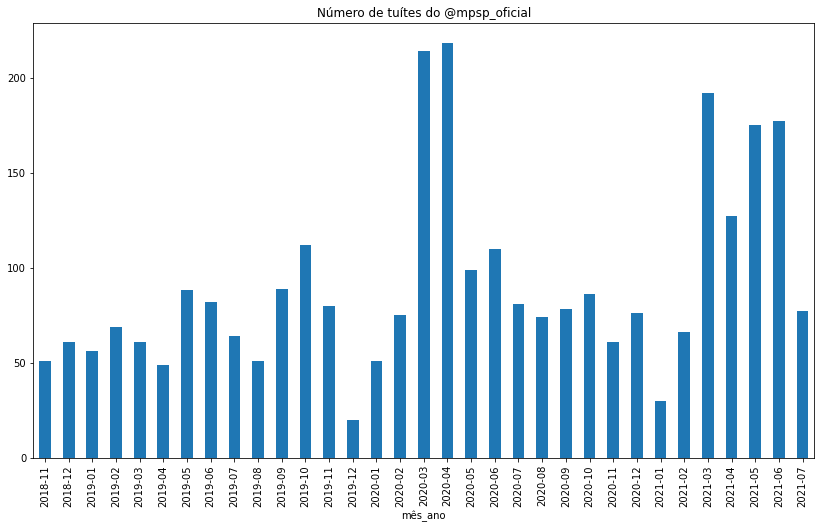

In [18]:
n_tweets.plot.bar(figsize=(14,8),title = 'Número de tuítes do @'+ username)
plt.savefig(username+"2.png")

In [19]:
n_retweets = tweets_mensais.groupby('mês_ano')['Qtd. retuítes'].sum()
n_retweets

mês_ano
2018-11     93
2018-12    159
2019-01    102
2019-02    125
2019-03    128
2019-04    118
2019-05    142
2019-06    141
2019-07    120
2019-08     86
2019-09     83
2019-10     88
2019-11     60
2019-12     21
2020-01     85
2020-02     53
2020-03    282
2020-04    234
2020-05    145
2020-06    103
2020-07     86
2020-08     74
2020-09     68
2020-10     76
2020-11     49
2020-12     52
2021-01     27
2021-02     96
2021-03    345
2021-04     92
2021-05     95
2021-06    728
2021-07     41
Freq: M, Name: Qtd. retuítes, dtype: int64

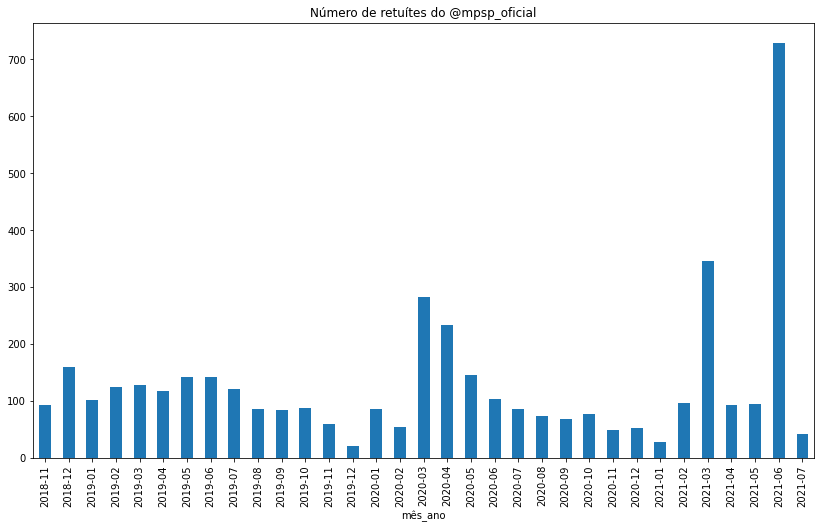

In [20]:
n_retweets.plot.bar(figsize=(14,8),title = 'Número de retuítes do @'+ username)
plt.savefig(username+"3.png")

In [21]:
n_likes = tweets_mensais.groupby('mês_ano')['Likes'].sum()
n_likes

mês_ano
2018-11     284
2018-12     487
2019-01     564
2019-02     519
2019-03     376
2019-04     404
2019-05     573
2019-06     550
2019-07     458
2019-08     270
2019-09     348
2019-10     423
2019-11     262
2019-12     107
2020-01     281
2020-02     272
2020-03     969
2020-04     583
2020-05     496
2020-06     388
2020-07     210
2020-08     194
2020-09     312
2020-10     305
2020-11     179
2020-12     296
2021-01     134
2021-02     281
2021-03    1002
2021-04     412
2021-05     478
2021-06    1482
2021-07     130
Freq: M, Name: Likes, dtype: int64

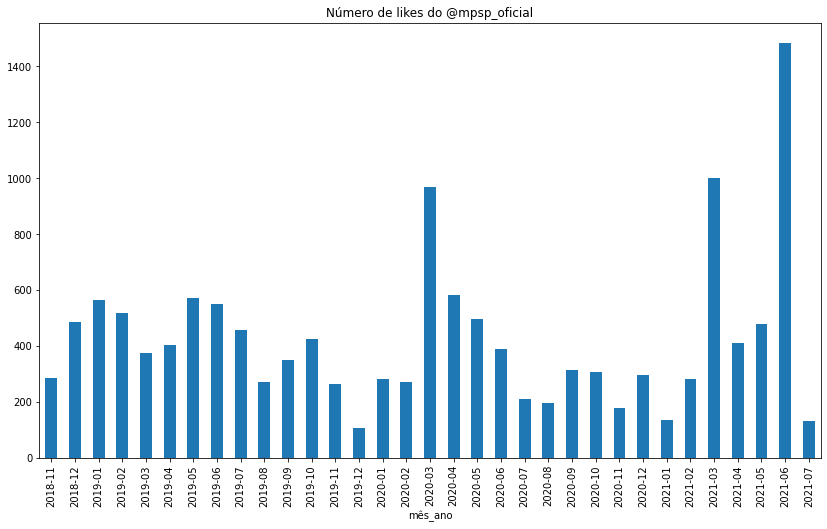

In [22]:
n_likes.plot.bar(figsize=(14,8),title = 'Número de likes do @'+ username)
plt.savefig(username+"4.png")

In [23]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id. único                  3000 non-null   object        
 1   Texto                      3000 non-null   object        
 2   Criado em                  3000 non-null   datetime64[ns]
 3   Usuário                    3000 non-null   object        
 4   Qtd. retuítes              3000 non-null   int64         
 5   Likes                      3000 non-null   int64         
 6   Língua                     3000 non-null   object        
 7   Fonte                      3000 non-null   object        
 8   Em resposta ao user:       338 non-null    object        
 9   Em resp. ao status de id:  338 non-null    object        
 10  Em resp. ao user de id:    338 non-null    object        
 11  Tuíte citado?              3000 non-null   bool          
 12  É retu